In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('phishing.csv', index_col='Index')
df

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1.0,1.0,1,1,-1,0.0,1.0,-1,1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,-1.0
1,1,0.0,1.0,1,1,-1,-1.0,-1.0,-1,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
2,1,0.0,1.0,1,1,-1,-1.0,-1.0,1,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
3,1,0.0,-1.0,1,1,-1,1.0,1.0,-1,1.0,...,-1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0
4,-1,0.0,-1.0,1,-1,-1,1.0,1.0,-1,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1.0,1.0,-1,1,1,1.0,NaN,-1,-1.0,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
11050,-1,1.0,1.0,-1,-1,-1,1.0,-1.0,-1,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
11051,1,-1.0,1.0,1,1,-1,1.0,NaN,-1,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,1.0,-1.0


In [3]:
df.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [4]:
df.isnull().any()

UsingIP                False
LongURL                 True
ShortURL                True
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains              True
HTTPS                   True
DomainRegLen            True
Favicon                 True
NonStdPort              True
HTTPSDomainURL          True
RequestURL              True
AnchorURL               True
LinksInScriptTags       True
ServerFormHandler       True
InfoEmail               True
AbnormalURL             True
WebsiteForwarding       True
StatusBarCust           True
DisableRightClick       True
UsingPopupWindow        True
IframeRedirection       True
AgeofDomain             True
DNSRecording            True
WebsiteTraffic          True
PageRank                True
GoogleIndex             True
LinksPointingToPage     True
StatsReport             True
class                   True
dtype: bool

In [5]:
df.fillna(0, inplace=True)

In [14]:
df.isnull().any()

Index                  False
UsingIP                False
LongURL                False
ShortURL               False
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains             False
HTTPS                  False
DomainRegLen           False
Favicon                False
NonStdPort             False
HTTPSDomainURL         False
RequestURL             False
AnchorURL              False
LinksInScriptTags      False
ServerFormHandler      False
InfoEmail              False
AbnormalURL            False
WebsiteForwarding      False
StatusBarCust          False
DisableRightClick      False
UsingPopupWindow       False
IframeRedirection      False
AgeofDomain            False
DNSRecording           False
WebsiteTraffic         False
PageRank               False
GoogleIndex            False
LinksPointingToPage    False
StatsReport            False
class                  False
dtype: bool

In [15]:
df['class'].value_counts()

class
 1    6157
-1    4897
Name: count, dtype: int64

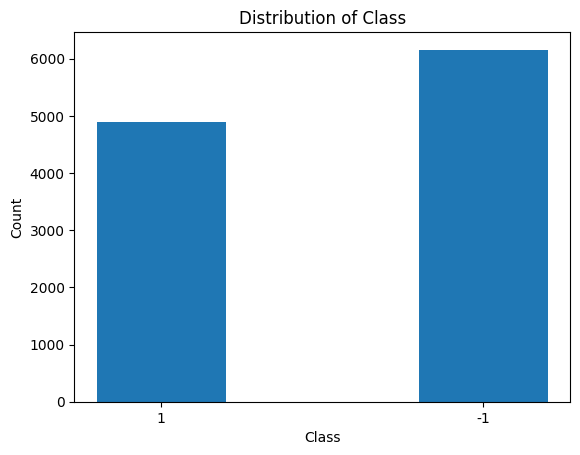

In [16]:
class_counts = df['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(class_counts.index, ['-1', '1'])

plt.show()

In [17]:
is_phishing = df[df['class'] == 1]
not_phishing = df[df['class'] == -1]

is_phishing_upsampled = resample(is_phishing, n_samples=len(not_phishing))

df_balanced = pd.concat([is_phishing_upsampled, not_phishing])
df_balanced['class'].value_counts()

class
 1    4897
-1    4897
Name: count, dtype: int64

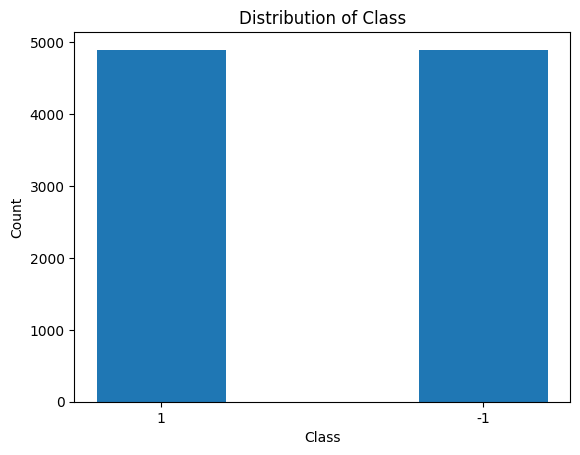

In [18]:
class_counts = df_balanced['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(class_counts.index, ['-1', '1'])

plt.show()

In [19]:
x_data = df_balanced.drop(columns=['class'])
y_data = df_balanced['class']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [20]:
params = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport']

In [23]:
model = LogisticRegression(max_iter=100_000)

rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)

print(f"Optimal number of features : {rfecv.n_features_}")

selected_features = [params[i] for i in range(len(params)) if rfecv.support_[i]]

print("Selected Features:", selected_features)

discarded_features = [params[i] for i in range(len(params)) if not rfecv.support_[i]]

print("Discarded Features:", discarded_features)

Optimal number of features : 19
Selected Features: ['LongURL', 'Symbol@', 'SubDomains', 'HTTPS', 'DomainRegLen', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'StatusBarCust', 'AgeofDomain', 'WebsiteTraffic', 'PageRank', 'LinksPointingToPage', 'StatsReport']
Discarded Features: ['UsingIP', 'ShortURL', 'Redirecting//', 'PrefixSuffix-', 'Favicon', 'AnchorURL', 'WebsiteForwarding', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'DNSRecording', 'GoogleIndex']


In [25]:
x_data.drop(columns=['UsingIP', 'ShortURL', 'Redirecting//', 'PrefixSuffix-', 'Favicon', 'AnchorURL',
                     'WebsiteForwarding', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection',
                     'DNSRecording', 'GoogleIndex'], inplace=True)

In [26]:
x_data = df_balanced.drop(columns=['class'])
y_data = df_balanced['class']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [27]:
linmodel = LinearRegression()

linmodel.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = linmodel.predict(x_test)

y_pred_class = np.where(y_pred > 0, 1, -1)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}\n")

report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(report)

Accuracy: 0.9280245022970903

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       961
           1       0.92      0.94      0.93       998

    accuracy                           0.93      1959
   macro avg       0.93      0.93      0.93      1959
weighted avg       0.93      0.93      0.93      1959



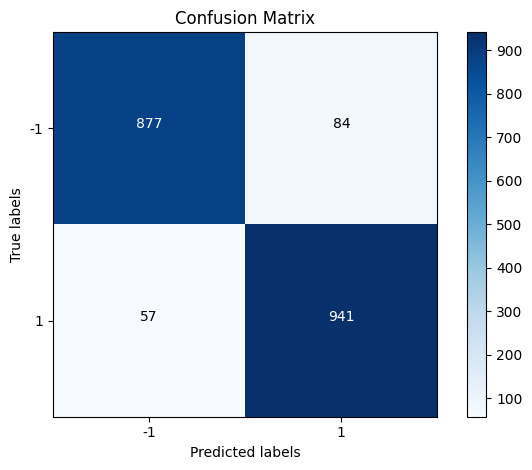

In [29]:
cm = confusion_matrix(y_test, y_pred_class)

classes = np.unique(y_test)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()

In [34]:
logmodel = LogisticRegression(solver='newton-cg')

logmodel.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [35]:
y_pred = logmodel.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9244512506380806

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.92      0.92       961
           1       0.92      0.93      0.93       998

    accuracy                           0.92      1959
   macro avg       0.92      0.92      0.92      1959
weighted avg       0.92      0.92      0.92      1959



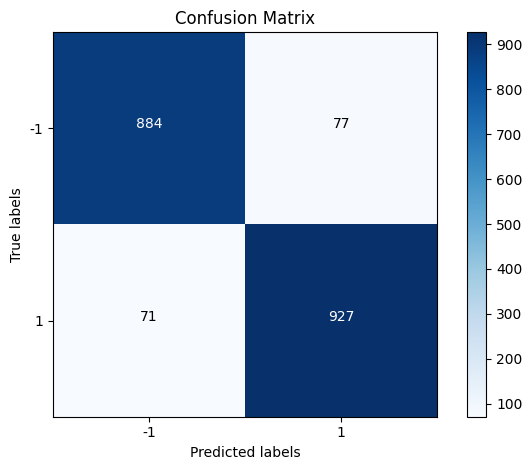

In [36]:
cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {
    'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train, y_train)

params = grid_search.best_params_

print("Best Hyperparameters:", params)

In [38]:
knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], weights=params['weights'], metric=params['metric'])

knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

In [39]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9723583460949464
Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.90      0.92       961
           1       0.91      0.95      0.93       998

    accuracy                           0.92      1959
   macro avg       0.92      0.92      0.92      1959
weighted avg       0.92      0.92      0.92      1959

